In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

# Read image
cat_image = plt.imread('C:/Users/RentalHub-L5/Desktop/13371_18106_bundle_archive/CAT_00/00000001_000.jpg')

# 이미지 픽셀화
# image_pixel = np.array(cat_image)

In [63]:
# 이미지 특징이 있는 좌표 값 불러오기
feature_loc = pd.read_csv('C:/Users/RentalHub-L5/Desktop/13371_18106_bundle_archive/CAT_00/00000001_000.jpg.cat', header = None)

# 불러온 좌표 값을 list화 하기 위한 작업
feature_loc = (feature_loc[0][0]).split(' ')

# 맨 끝에 공백이 있으므로 이를 삭제
feature_loc.pop()

# list안에 있는 value가 string 인데 이를 좌표 값으로 활용해야 하므로 int로 변환해주는 작업
feature_loc = list(map(int, feature_loc))

In [64]:
# x 좌표 y 좌표를 분리하여 저장
x_locs = []
y_locs = []
locs = []

for i in range(7, (feature_loc[0] * 2) + 1):
    
    if (i % 2 != 0):
        
        x_locs.append(feature_loc[i])
        
    else:
        
        y_locs.append(feature_loc[i])

        
for i in range(len(x_locs)):
    locs.append((x_locs[i], y_locs[i]))

# 귀 부분 좌표값만 리스트에 담기
left_ear = locs[:3]

right_ear = locs[3:]

In [65]:
print(left_ear)

[(149, 121), (137, 78), (166, 93)]


In [59]:
# 왼쪽귀
# 가장 왼쪽에 있는 좌표
max_left = min(left_ear)[0]

# 가장 오른쪽에 있는 좌표
max_right = max(left_ear)[0]

# 가장 높이 있는 좌표
max_top = min(left_ear, key = lambda x : x[1])[1]

#가장 아래 있는 좌표
max_bottom = max(left_ear, key = lambda x : x[1])[1]

left_ear_image = plt.imshow(cat_image[(max_top - 15) : (max_bottom + 15), (max_left - 15) : (max_right + 15)])
plt.axis('off')
plt.savefig('C:/Users/RentalHub-L5/Desktop/left_ear/0002.jpg', bbox_inches='tight', pad_inches = 0)
plt.close()

# 오른쪽 귀
# 가장 왼쪽에 있는 좌표
max_left = min(right_ear)[0]

# 가장 오른쪽에 있는 좌표
max_right = max(right_ear)[0]

# 가장 높이 있는 좌표
max_top = min(right_ear, key = lambda x : x[1])[1]

#가장 아래 있는 좌표
max_bottom = max(right_ear, key = lambda x : x[1])[1]

right_ear_image = plt.imshow(cat_image[(max_top - 15) : (max_bottom + 15), (max_left - 15) : (max_right + 15)])
plt.axis('off')
plt.savefig('C:/Users/RentalHub-L5/Desktop/right_ear/0002.jpg', bbox_inches='tight', pad_inches = 0)
plt.close()

ValueError: zero-size array to reduction operation minimum which has no identity

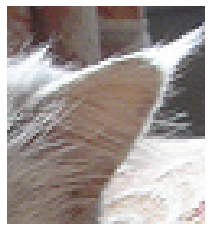

In [78]:
import os
import matplotlib.pyplot as plt
import pandas as pd
 
path_dir = 'C:/Users/RentalHub-L5/Desktop/13371_18106_bundle_archive/cats'
folders = os.listdir(path_dir)

for folder in folders:

    cat_file_list = os.listdir(path_dir + '/' + folder)
    
    for file in cat_file_list:
        
        x_locs = []
        y_locs = []
        locs = []
        
        if file == 'Thubms.db':
            continue
            
        elif file[-3:] == 'jpg':
            
            cat_image = plt.imread('C:/Users/RentalHub-L5/Desktop/13371_18106_bundle_archive/cats' + '/' + folder + '/' + file)
            continue
            
        elif file[-3:] == 'cat':
                        
            feature_loc = pd.read_csv('C:/Users/RentalHub-L5/Desktop/13371_18106_bundle_archive/cats' + '/' + folder + '/' + file, header = None)
            feature_loc = (feature_loc[0][0]).split(' ')
            feature_loc.pop()
            feature_loc = list(map(int, feature_loc))            

            for i in range(7, (feature_loc[0] * 2) + 1):

                if (i % 2 != 0):
                    x_locs.append(feature_loc[i])

                else:
                    y_locs.append(feature_loc[i])


            for i in range(len(x_locs)):
                
                locs.append((x_locs[i], y_locs[i]))
                left_ear = locs[:3]
                right_ear = locs[3:]
                
        max_left = min(left_ear)[0]
        max_right = max(left_ear)[0]
        max_top = min(left_ear, key = lambda x : x[1])[1]
        max_bottom = max(left_ear, key = lambda x : x[1])[1]
        left_ear_image = plt.imshow(cat_image[(max_top - 15) : (max_bottom + 15), (max_left - 15) : (max_right + 15)])
        plt.axis('off')
        plt.savefig('C:/Users/RentalHub-L5/Desktop/left_ear/' + file[:-7], bbox_inches='tight', pad_inches = 0)

        max_left = min(right_ear)[0]
        max_right = max(right_ear)[0]
        max_top = min(right_ear, key = lambda x : x[1])[1]
        max_bottom = max(right_ear, key = lambda x : x[1])[1]
        right_ear_image = plt.imshow(cat_image[(max_top - 15) : (max_bottom + 15), (max_left - 15) : (max_right + 15)])
        plt.axis('off')
        plt.savefig('C:/Users/RentalHub-L5/Desktop/right_ear/' + file[:-7], bbox_inches='tight', pad_inches = 0)

In [14]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def extract_file(path):
    
    img_file_list = []
    cat_file_list = []
    files = os.listdir(path)

    for file in files:

        if file[-3 :] == 'jpg':

            img_file_list.append(file)

        elif file[-3 :] == 'cat':

            cat_file_list.append(file)

    return img_file_list, cat_file_list


def preprocessing_cat_file(folder, cat_file):
    
    x_locs = []
    y_locs = []
    locs = []
    loc_list = []
    feature_loc = pd.read_csv('C:/Users/RentalHub-L5/Desktop/13371_18106_bundle_archive/cats' + '/' + folder + '/' + cat_file, header = None)
    feature_loc = (feature_loc[0][0]).split(' ')
    feature_loc.pop()
    feature_loc = list(map(int, feature_loc))            

    for i in range(7, (feature_loc[0] * 2) + 1):

        if (i % 2 != 0):
            x_locs.append(feature_loc[i])

        else:
            y_locs.append(feature_loc[i])


    for i in range(len(x_locs)):

        locs.append((x_locs[i], y_locs[i]))
        left_ear = locs[:3]
        right_ear = locs[3:]

    le_max_left = min(left_ear)[0]
    le_max_right = max(left_ear)[0]
    le_max_top = min(left_ear, key = lambda x : x[1])[1]
    le_max_bottom = max(left_ear, key = lambda x : x[1])[1]
    
    re_max_left = min(right_ear)[0]
    re_max_right = max(right_ear)[0]
    re_max_top = min(right_ear, key = lambda x : x[1])[1]
    re_max_bottom = max(right_ear, key = lambda x : x[1])[1]
    
    loc_list.append(le_max_left)
    loc_list.append(le_max_right)
    loc_list.append(le_max_top)
    loc_list.append(le_max_bottom)
    loc_list.append(re_max_left)
    loc_list.append(re_max_right)
    loc_list.append(re_max_top)
    loc_list.append(re_max_bottom)
    
    return loc_list


def ear_img_save(cat_image, file_name, loc_list):
    
    for i in range(2):
        
        if i == 0:
            
            left_ear_image = plt.imshow(cat_image[(loc_list[2] - 15) : (loc_list[3] + 15), (loc_list[0] - 15) : (loc_list[1] + 15)])
            plt.axis('off')
            plt.savefig('C:/Users/RentalHub-L5/Desktop/left_ear/' + file_name, bbox_inches='tight', pad_inches = 0)
            plt.close()
            print(file_name, '왼쪽 귀 저장 완료')
            
        if i == 1:
            
            left_ear_image = plt.imshow(cat_image[(loc_list[6] - 15) : (loc_list[7] + 15), (loc_list[4] - 15) : (loc_list[5] + 15)])
            plt.axis('off')
            plt.savefig('C:/Users/RentalHub-L5/Desktop/right_ear/' + file_name, bbox_inches='tight', pad_inches = 0)
            plt.close()
            return print(file_name, '오른쪽 귀 저장 완료')

In [ ]:
path = 'C:/Users/RentalHub-L5/Desktop/13371_18106_bundle_archive/cats'
folders = os.listdir(path)

for folder in folders:
    
    img_file_list, cat_file_list = extract_file(path + '/' + folder)
    
    for i in range(len(img_file_list)):
        
        cat_image = plt.imread('C:/Users/RentalHub-L5/Desktop/13371_18106_bundle_archive/cats' + '/' + folder + '/' + img_file_list[i])
        loc_list = preprocessing_cat_file(folder, cat_file_list[i])
        
        try:
            ear_img_save(cat_image, img_file_list[i][:-4], loc_list)
            
        except Exception as ex:
            print(ex)

00000001_000 왼쪽 귀 저장 완료
00000001_000 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000001_008 왼쪽 귀 저장 완료
00000001_008 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000001_012 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000001_016 왼쪽 귀 저장 완료
00000001_016 오른쪽 귀 저장 완료
00000001_017 왼쪽 귀 저장 완료
00000001_017 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000001_027 왼쪽 귀 저장 완료
00000001_027 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000002_001 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000002_003 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000002_026 왼쪽 귀 저장 완료
00000002_026 오른쪽 귀 저장 완료
zero-size arr

zero-size array to reduction operation minimum which has no identity
00000019_010 왼쪽 귀 저장 완료
00000019_010 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000019_020 왼쪽 귀 저장 완료
00000019_020 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000019_024 왼쪽 귀 저장 완료
00000019_024 오른쪽 귀 저장 완료
00000019_025 왼쪽 귀 저장 완료
00000019_025 오른쪽 귀 저장 완료
00000019_026 왼쪽 귀 저장 완료
00000019_026 오른쪽 귀 저장 완료
00000019_027 왼쪽 귀 저장 완료
00000019_027 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000020_002 왼쪽 귀 저장 완료
00000020_002 오른쪽 귀 저장 완료
00000020_004 왼쪽 귀 저장 완료
00000020_004 오른쪽 귀 저장 완료
00000020_005 왼쪽 귀 저장 완료
00000020_005 오른쪽 귀 저장 완료
00000020_006 왼쪽 귀 저장 완료
00000020_006 오른쪽 귀 저장 완료
00000020_015 왼쪽 귀 저장 완료
00000020_015 오른쪽 귀 저장 완료
00000020_017 왼쪽 귀 저장 완료
00000020_017 오른쪽 귀 저장 완료
00000020_018 왼쪽 귀 저장 완료
00000020_018 오른쪽 귀 저장 완료
00000021_008 왼쪽 귀 저장 완료
00000021_008 오른쪽 귀 저장 완료
zero-size array to reduction operation

00000038_010 왼쪽 귀 저장 완료
00000038_010 오른쪽 귀 저장 완료
00000038_015 왼쪽 귀 저장 완료
00000038_015 오른쪽 귀 저장 완료
00000038_016 왼쪽 귀 저장 완료
00000038_016 오른쪽 귀 저장 완료
00000038_020 왼쪽 귀 저장 완료
00000038_020 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000039_013 왼쪽 귀 저장 완료
00000039_013 오른쪽 귀 저장 완료
00000039_017 왼쪽 귀 저장 완료
00000039_017 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000040_018 왼쪽 귀 저장 완료
00000040_018 오른쪽 귀 저장 완료
00000040_019 왼쪽 귀 저장 완료
00000040_019 오른쪽 귀 저장 완료
00000040_022 왼쪽 귀 저장 완료
00000040_022 오른쪽 귀 저장 완료
00000040_023 왼쪽 귀 저장 완료
00000040_023 오른쪽 귀 저장 완료
00000040_025 왼쪽 귀 저장 완료
00000040_025 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000040_029 왼쪽 귀 저장 완료
00000040_029 오른쪽 귀 저장 완료
00000041_000 왼쪽 귀 저장 완료
00000041_000 오른쪽 귀 저장 완료
00000041_001 왼쪽 귀 저장 완료
00000041_001 오른쪽 귀 저장 완료
00000041_003 왼쪽 귀 저장 완료
00000041_003 오른쪽 귀 저장 완료
00000041_007 왼쪽 귀 저장 완료
00000041_007 오른쪽 귀 저장 완료
00000041_

zero-size array to reduction operation minimum which has no identity
00000063_002 왼쪽 귀 저장 완료
00000063_002 오른쪽 귀 저장 완료
00000063_003 왼쪽 귀 저장 완료
00000063_003 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000063_006 왼쪽 귀 저장 완료
00000063_006 오른쪽 귀 저장 완료
00000063_009 왼쪽 귀 저장 완료
00000063_009 오른쪽 귀 저장 완료
00000063_012 왼쪽 귀 저장 완료
00000063_012 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000063_015 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000063_018 왼쪽 귀 저장 완료
00000063_018 오른쪽 귀 저장 완료
00000063_027 왼쪽 귀 저장 완료
00000063_027 오른쪽 귀 저장 완료
00000063_028 왼쪽 귀 저장 완료
00000063_028 오른쪽 귀 저장 완료
00000064_000 왼쪽 귀 저장 완료
00000064_000 오른쪽 귀 저장 완료
00000064_006 왼쪽 귀 저장 완료
00000064_006 오른쪽 귀 저장 완료
00000064_007 왼쪽 귀 저장 완료
00000064_007 오른쪽 귀 저장 완료
00000064_017 왼쪽 귀 저장 완료
00000064_017 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000064_021 왼쪽 귀 저장 완료
00000064_021 오른쪽 귀 

00000087_026 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000088_015 왼쪽 귀 저장 완료
00000088_015 오른쪽 귀 저장 완료
00000088_020 왼쪽 귀 저장 완료
00000088_020 오른쪽 귀 저장 완료
00000088_022 왼쪽 귀 저장 완료
00000088_022 오른쪽 귀 저장 완료
00000088_025 왼쪽 귀 저장 완료
00000088_025 오른쪽 귀 저장 완료
00000089_000 왼쪽 귀 저장 완료
00000089_000 오른쪽 귀 저장 완료
00000089_001 왼쪽 귀 저장 완료
00000089_001 오른쪽 귀 저장 완료
00000089_007 왼쪽 귀 저장 완료
00000089_007 오른쪽 귀 저장 완료
00000089_011 왼쪽 귀 저장 완료
00000089_011 오른쪽 귀 저장 완료
00000089_015 왼쪽 귀 저장 완료
00000089_015 오른쪽 귀 저장 완료
00000089_016 왼쪽 귀 저장 완료
00000089_016 오른쪽 귀 저장 완료
00000089_020 왼쪽 귀 저장 완료
00000089_020 오른쪽 귀 저장 완료
00000089_021 왼쪽 귀 저장 완료
00000089_021 오른쪽 귀 저장 완료
00000090_004 왼쪽 귀 저장 완료
00000090_004 오른쪽 귀 저장 완료
00000090_008 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000090_025 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size arra

00000310_029 왼쪽 귀 저장 완료
00000310_029 오른쪽 귀 저장 완료
00000311_000 왼쪽 귀 저장 완료
00000311_000 오른쪽 귀 저장 완료
00000311_008 왼쪽 귀 저장 완료
00000311_008 오른쪽 귀 저장 완료
00000311_014 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000311_015 왼쪽 귀 저장 완료
00000311_015 오른쪽 귀 저장 완료
00000311_020 왼쪽 귀 저장 완료
00000311_020 오른쪽 귀 저장 완료
00000312_012 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000312_013 왼쪽 귀 저장 완료
00000312_013 오른쪽 귀 저장 완료
00000312_016 왼쪽 귀 저장 완료
00000312_016 오른쪽 귀 저장 완료
00000312_018 왼쪽 귀 저장 완료
00000312_018 오른쪽 귀 저장 완료
00000312_025 왼쪽 귀 저장 완료
00000312_025 오른쪽 귀 저장 완료
00000313_001 왼쪽 귀 저장 완료
00000313_001 오른쪽 귀 저장 완료
00000313_005 왼쪽 귀 저장 완료
00000313_005 오른쪽 귀 저장 완료
00000313_014 왼쪽 귀 저장 완료
00000313_014 오른쪽 귀 저장 완료
00000313_016 왼쪽 귀 저장 완료
00000313_016 오른쪽 귀 저장 완료
00000313_020 왼쪽 귀 저장 완료
00000313_020 오른쪽 귀 저장 완료
00000314_007 왼쪽 귀 저장 완료
00000314_007 오른쪽 귀 저장 완료
00000314_014 왼쪽 귀 저장 완료
00000314_014 오른쪽 귀 저장 완료
00000314_025 왼쪽 귀 저장 완료
000003

00000334_017 오른쪽 귀 저장 완료
00000334_028 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000335_007 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000335_008 왼쪽 귀 저장 완료
00000335_008 오른쪽 귀 저장 완료
00000335_019 왼쪽 귀 저장 완료
00000335_019 오른쪽 귀 저장 완료
00000335_025 왼쪽 귀 저장 완료
00000335_025 오른쪽 귀 저장 완료
00000335_026 왼쪽 귀 저장 완료
00000335_026 오른쪽 귀 저장 완료
00000335_027 왼쪽 귀 저장 완료
00000335_027 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000336_001 왼쪽 귀 저장 완료
00000336_001 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000336_011 왼쪽 귀 저장 완료
00000336_011 오른쪽 귀 저장 완료
00000336_015 왼쪽 귀 저장 완료
00000336_015 오른쪽 귀 저장 완료
00000336_018 왼쪽 귀 저장 완료
00000336_018 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000336_020 왼쪽 귀 저장 완료
00000336_020 오른쪽 귀 저장 완료
00000336_025 왼쪽 귀 저장 완료

00000355_004 오른쪽 귀 저장 완료
00000355_010 왼쪽 귀 저장 완료
00000355_010 오른쪽 귀 저장 완료
00000355_012 왼쪽 귀 저장 완료
00000355_012 오른쪽 귀 저장 완료
00000355_013 왼쪽 귀 저장 완료
00000355_013 오른쪽 귀 저장 완료
00000355_017 왼쪽 귀 저장 완료
00000355_017 오른쪽 귀 저장 완료
00000355_024 왼쪽 귀 저장 완료
00000355_024 오른쪽 귀 저장 완료
00000355_027 왼쪽 귀 저장 완료
00000355_027 오른쪽 귀 저장 완료
00000356_003 왼쪽 귀 저장 완료
00000356_003 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000356_006 왼쪽 귀 저장 완료
00000356_006 오른쪽 귀 저장 완료
00000356_010 왼쪽 귀 저장 완료
00000356_010 오른쪽 귀 저장 완료
00000356_013 왼쪽 귀 저장 완료
00000356_013 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000357_004 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000357_007 왼쪽 귀 저장 완료
00000357_007 오른쪽 귀 저장 완료
00000357_012 왼쪽 귀 저장 완료
00000357_012 오른쪽 귀 저장 완료
00000357_016 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000357_017 왼쪽 귀 저장 완료
00000357_017 오른쪽 귀 저장 완료
00000357_018 왼

00000377_012 왼쪽 귀 저장 완료
00000377_012 오른쪽 귀 저장 완료
00000377_017 왼쪽 귀 저장 완료
00000377_017 오른쪽 귀 저장 완료
00000377_022 왼쪽 귀 저장 완료
00000377_022 오른쪽 귀 저장 완료
00000378_000 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000378_007 왼쪽 귀 저장 완료
00000378_007 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000378_010 왼쪽 귀 저장 완료
00000378_010 오른쪽 귀 저장 완료
00000378_011 왼쪽 귀 저장 완료
00000378_011 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000378_026 왼쪽 귀 저장 완료
00000378_026 오른쪽 귀 저장 완료
00000378_029 왼쪽 귀 저장 완료
00000378_029 오른쪽 귀 저장 완료
00000379_001 왼쪽 귀 저장 완료
00000379_001 오른쪽 귀 저장 완료
00000379_003 왼쪽 귀 저장 완료
00000379_003 오른쪽 귀 저장 완료
00000379_005 왼쪽 귀 저장 완료
00000379_005 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000379_020 왼쪽 귀 저장 완료
00000379_020 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000379_029 왼쪽 귀 저장 완료
00000379_029 오른쪽 귀 

00000400_028 왼쪽 귀 저장 완료
00000400_028 오른쪽 귀 저장 완료
00000401_001 왼쪽 귀 저장 완료
00000401_001 오른쪽 귀 저장 완료
00000401_007 왼쪽 귀 저장 완료
00000401_007 오른쪽 귀 저장 완료
00000401_008 왼쪽 귀 저장 완료
00000401_008 오른쪽 귀 저장 완료
00000401_012 왼쪽 귀 저장 완료
00000401_012 오른쪽 귀 저장 완료
00000401_015 왼쪽 귀 저장 완료
00000401_015 오른쪽 귀 저장 완료
00000401_016 왼쪽 귀 저장 완료
00000401_016 오른쪽 귀 저장 완료
00000401_021 왼쪽 귀 저장 완료
00000401_021 오른쪽 귀 저장 완료
00000401_022 왼쪽 귀 저장 완료
00000401_022 오른쪽 귀 저장 완료
00000401_024 왼쪽 귀 저장 완료
00000401_024 오른쪽 귀 저장 완료
00000401_029 왼쪽 귀 저장 완료
00000401_029 오른쪽 귀 저장 완료
00000402_000 왼쪽 귀 저장 완료
00000402_000 오른쪽 귀 저장 완료
00000402_002 왼쪽 귀 저장 완료
00000402_002 오른쪽 귀 저장 완료
00000402_014 왼쪽 귀 저장 완료
00000402_014 오른쪽 귀 저장 완료
00000402_015 왼쪽 귀 저장 완료
00000402_015 오른쪽 귀 저장 완료
00000402_019 왼쪽 귀 저장 완료
00000402_019 오른쪽 귀 저장 완료
00000402_025 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000402_026 왼쪽 귀 저장 완료
00000402_026 오른쪽 귀 저장 완료
00000403_009 왼쪽 귀 저장 완료
00000403_009 오른쪽 귀 저장 완료
00000403_010 왼쪽 귀 저장 완료
0

00000427_026 왼쪽 귀 저장 완료
00000427_026 오른쪽 귀 저장 완료
00000427_027 왼쪽 귀 저장 완료
00000427_027 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000428_013 왼쪽 귀 저장 완료
00000428_013 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000428_019 왼쪽 귀 저장 완료
00000428_019 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000428_021 왼쪽 귀 저장 완료
00000428_021 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000429_003 왼쪽 귀 저장 완료
00000429_003 오른쪽 귀 저장 완료
00000429_021 왼쪽 귀 저장 완료
00000429_021 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000429_023 왼쪽 귀 저장 완료
00000429_023 오른쪽 귀 저장 완료
00000429_024 왼쪽 귀 저장 완료
00000429_024 오른쪽 귀 저장 완료
00000430_000 왼쪽 귀 저장 완료
00000430_000 오른쪽 귀 저장 완료
00000430_001 왼쪽 귀 저장 완료
00000430_001 오른쪽 귀 저장 완료
00000430_002 왼쪽 귀 저장 완료
00000430_002 오른쪽 귀 저장 완

00000449_003 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000449_009 왼쪽 귀 저장 완료
00000449_009 오른쪽 귀 저장 완료
00000449_010 왼쪽 귀 저장 완료
00000449_010 오른쪽 귀 저장 완료
00000449_015 왼쪽 귀 저장 완료
00000449_015 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000449_026 왼쪽 귀 저장 완료
00000449_026 오른쪽 귀 저장 완료
00000450_002 왼쪽 귀 저장 완료
00000450_002 오른쪽 귀 저장 완료
00000450_004 왼쪽 귀 저장 완료
00000450_004 오른쪽 귀 저장 완료
00000450_005 왼쪽 귀 저장 완료
00000450_005 오른쪽 귀 저장 완료
00000450_009 왼쪽 귀 저장 완료
00000450_009 오른쪽 귀 저장 완료
00000450_016 왼쪽 귀 저장 완료
00000450_016 오른쪽 귀 저장 완료
00000450_019 왼쪽 귀 저장 완료
00000450_019 오른쪽 귀 저장 완료
00000450_021 왼쪽 귀 저장 완료
00000450_021 오른쪽 귀 저장 완료
00000450_022 왼쪽 귀 저장 완료
00000450_022 오른쪽 귀 저장 완료
00000450_024 왼쪽 귀 저장 완료
00000450_024 오른쪽 귀 저장 완료
00000450_028 왼쪽 귀 저장 완료
00000450_028 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000451_016 왼쪽 귀 저장 완료
00000451_016 오른쪽 귀 저장 완료
00000451_018 왼쪽 귀 저장 완료
00000451_0

00000112_001 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000112_006 왼쪽 귀 저장 완료
00000112_006 오른쪽 귀 저장 완료
00000112_009 왼쪽 귀 저장 완료
00000112_009 오른쪽 귀 저장 완료
00000112_021 왼쪽 귀 저장 완료
00000112_021 오른쪽 귀 저장 완료
00000112_029 왼쪽 귀 저장 완료
00000112_029 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000113_002 왼쪽 귀 저장 완료
00000113_002 오른쪽 귀 저장 완료
00000113_003 왼쪽 귀 저장 완료
00000113_003 오른쪽 귀 저장 완료
00000113_005 왼쪽 귀 저장 완료
00000113_005 오른쪽 귀 저장 완료
00000113_011 왼쪽 귀 저장 완료
00000113_011 오른쪽 귀 저장 완료
00000113_013 왼쪽 귀 저장 완료
00000113_013 오른쪽 귀 저장 완료
00000113_014 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000113_015 왼쪽 귀 저장 완료
00000113_015 오른쪽 귀 저장 완료
00000113_018 왼쪽 귀 저장 완료
00000113_018 오른쪽 귀 저장 완료
00000113_024 왼쪽 귀 저장 완료
00000113_024 오른쪽 귀 저장 완료
00000113_029 왼쪽 귀 저장 완료
00000113_029 오른쪽 귀 저장 완료
00000114_007 왼쪽 귀 저장 완료
00000114_007 오른쪽 귀 저장 완료
00000114_010 왼쪽 귀 저장 완료
zero-size array to reduction operat

zero-size array to reduction operation minimum which has no identity
00000132_013 왼쪽 귀 저장 완료
00000132_013 오른쪽 귀 저장 완료
00000132_016 왼쪽 귀 저장 완료
00000132_016 오른쪽 귀 저장 완료
00000132_018 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000132_021 왼쪽 귀 저장 완료
00000132_021 오른쪽 귀 저장 완료
00000132_023 왼쪽 귀 저장 완료
00000132_023 오른쪽 귀 저장 완료
00000132_024 왼쪽 귀 저장 완료
00000132_024 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000132_029 왼쪽 귀 저장 완료
00000132_029 오른쪽 귀 저장 완료
00000133_000 왼쪽 귀 저장 완료
00000133_000 오른쪽 귀 저장 완료
00000133_007 왼쪽 귀 저장 완료
00000133_007 오른쪽 귀 저장 완료
00000133_008 왼쪽 귀 저장 완료
00000133_008 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000133_013 왼쪽 귀 저장 완료
00000133_013 오른쪽 귀 저장 완료
00000133_017 왼쪽 귀 저장 완료
00000133_017 오른쪽 귀 저장 완료
00000133_023 왼쪽 귀 저장 완료
00000133_023 오른쪽 귀 저장 완료
00000133_025 왼쪽 귀 저장 완료
zero-size array to 

00000148_001 오른쪽 귀 저장 완료
00000148_007 왼쪽 귀 저장 완료
00000148_007 오른쪽 귀 저장 완료
00000148_009 왼쪽 귀 저장 완료
00000148_009 오른쪽 귀 저장 완료
00000148_015 왼쪽 귀 저장 완료
00000148_015 오른쪽 귀 저장 완료
00000148_018 왼쪽 귀 저장 완료
00000148_018 오른쪽 귀 저장 완료
00000148_020 왼쪽 귀 저장 완료
00000148_020 오른쪽 귀 저장 완료
00000148_028 왼쪽 귀 저장 완료
00000148_028 오른쪽 귀 저장 완료
00000148_029 왼쪽 귀 저장 완료
00000148_029 오른쪽 귀 저장 완료
00000149_001 왼쪽 귀 저장 완료
00000149_001 오른쪽 귀 저장 완료
00000149_004 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000149_005 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000149_010 왼쪽 귀 저장 완료
00000149_010 오른쪽 귀 저장 완료
00000149_011 왼쪽 귀 저장 완료
00000149_011 오른쪽 귀 저장 완료
00000149_013 왼쪽 귀 저장 완료
00000149_013 오른쪽 귀 저장 완료
00000149_017 왼쪽 귀 저장 완료
00000149_017 오른쪽 귀 저장 완료
00000149_020 왼쪽 귀 저장 완료
00000149_020 오른쪽 귀 저장 완료
00000149_026 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000149_028 왼쪽 귀 저장 완료
00000149_028 오른쪽 귀 저장 완료
zero-size 

00000166_003 왼쪽 귀 저장 완료
00000166_003 오른쪽 귀 저장 완료
00000166_004 왼쪽 귀 저장 완료
00000166_004 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000166_011 왼쪽 귀 저장 완료
00000166_011 오른쪽 귀 저장 완료
00000166_015 왼쪽 귀 저장 완료
00000166_015 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000166_021 왼쪽 귀 저장 완료
00000166_021 오른쪽 귀 저장 완료
00000166_026 왼쪽 귀 저장 완료
00000166_026 오른쪽 귀 저장 완료
00000166_028 왼쪽 귀 저장 완료
00000166_028 오른쪽 귀 저장 완료
00000166_029 왼쪽 귀 저장 완료
00000166_029 오른쪽 귀 저장 완료
00000167_002 왼쪽 귀 저장 완료
00000167_002 오른쪽 귀 저장 완료
00000167_006 왼쪽 귀 저장 완료
00000167_006 오른쪽 귀 저장 완료
00000167_009 왼쪽 귀 저장 완료
00000167_009 오른쪽 귀 저장 완료
00000167_010 왼쪽 귀 저장 완료
00000167_010 오른쪽 귀 저장 완료
00000167_028 왼쪽 귀 저장 완료
00000167_028 오른쪽 귀 저장 완료
00000167_029 왼쪽 귀 저장 완료
00000167_029 오른쪽 귀 저장 완료
00000168_004 왼쪽 귀 저장 완료
00000168_004 오른쪽 귀 저장 완료
00000168_007 왼쪽 귀 저장 완료
00000168_007 오른쪽 귀 저장 완료
00000168_023 왼쪽 귀 저장 완료
00000168_023 오른쪽 귀 저장 완료
00000168_024 왼쪽 귀 저장 완료
00000

00000184_016 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000184_017 왼쪽 귀 저장 완료
00000184_017 오른쪽 귀 저장 완료
00000184_021 왼쪽 귀 저장 완료
00000184_021 오른쪽 귀 저장 완료
00000184_022 왼쪽 귀 저장 완료
00000184_022 오른쪽 귀 저장 완료
00000184_023 왼쪽 귀 저장 완료
00000184_023 오른쪽 귀 저장 완료
00000184_024 왼쪽 귀 저장 완료
00000184_024 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000184_027 왼쪽 귀 저장 완료
00000184_027 오른쪽 귀 저장 완료
00000184_028 왼쪽 귀 저장 완료
00000184_028 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000185_001 왼쪽 귀 저장 완료
00000185_001 오른쪽 귀 저장 완료
00000185_004 왼쪽 귀 저장 완료
00000185_004 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000185_020 왼쪽 귀 저장 완료
00000185_020 오른쪽 귀 저장 완료
00000186_002 왼쪽 귀 저장 완료
00000186_002 오른쪽 귀 저장 완료
00000186_008 왼쪽 귀 저장 완료
00000186_008 오른쪽 귀 저장 완료
00000186_010 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000186_011 왼쪽 귀 저

00000200_005 오른쪽 귀 저장 완료
00000200_006 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000200_018 왼쪽 귀 저장 완료
00000200_018 오른쪽 귀 저장 완료
00000200_019 왼쪽 귀 저장 완료
00000200_019 오른쪽 귀 저장 완료
00000200_020 왼쪽 귀 저장 완료
00000200_020 오른쪽 귀 저장 완료
00000200_023 왼쪽 귀 저장 완료
00000200_023 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000201_003 왼쪽 귀 저장 완료
00000201_003 오른쪽 귀 저장 완료
00000201_005 왼쪽 귀 저장 완료
00000201_005 오른쪽 귀 저장 완료
00000201_011 왼쪽 귀 저장 완료
00000201_011 오른쪽 귀 저장 완료
00000201_012 왼쪽 귀 저장 완료
00000201_012 오른쪽 귀 저장 완료
00000201_014 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000201_020 왼쪽 귀 저장 완료
00000201_020 오른쪽 귀 저장 완료
00000201_023 왼쪽 귀 저장 완료
00000201_023 오른쪽 귀 저장 완료
00000202_007 왼쪽 귀 저장 완료
00000202_007 오른쪽 귀 저장 완료
00000202_009 왼쪽 귀 저장 완료
00000202_009 오른쪽 귀 

00000219_018 오른쪽 귀 저장 완료
00000219_019 왼쪽 귀 저장 완료
00000219_019 오른쪽 귀 저장 완료
00000219_026 왼쪽 귀 저장 완료
00000219_026 오른쪽 귀 저장 완료
00000220_000 왼쪽 귀 저장 완료
00000220_000 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000220_005 왼쪽 귀 저장 완료
00000220_005 오른쪽 귀 저장 완료
00000220_009 왼쪽 귀 저장 완료
00000220_009 오른쪽 귀 저장 완료
00000220_011 왼쪽 귀 저장 완료
00000220_011 오른쪽 귀 저장 완료
00000220_014 왼쪽 귀 저장 완료
00000220_014 오른쪽 귀 저장 완료
00000220_016 왼쪽 귀 저장 완료
00000220_016 오른쪽 귀 저장 완료
00000220_018 왼쪽 귀 저장 완료
00000220_018 오른쪽 귀 저장 완료
00000220_021 왼쪽 귀 저장 완료
00000220_021 오른쪽 귀 저장 완료
00000220_022 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000220_023 왼쪽 귀 저장 완료
00000220_023 오른쪽 귀 저장 완료
00000221_016 왼쪽 귀 저장 완료
00000221_016 오른쪽 귀 저장 완료
00000221_017 왼쪽 귀 저장 완료
00000221_017 오른쪽 귀 저장 완료
00000221_023 왼쪽 귀 저장 완료
00000221_023 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000221_028 왼쪽 귀 저장 완료
00000221_028 오른쪽 귀 저장 완료
00000222_

00000238_014 왼쪽 귀 저장 완료
00000238_014 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000238_027 왼쪽 귀 저장 완료
00000238_027 오른쪽 귀 저장 완료
00000239_004 왼쪽 귀 저장 완료
00000239_004 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000239_012 왼쪽 귀 저장 완료
00000239_012 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000239_028 왼쪽 귀 저장 완료
00000239_028 오른쪽 귀 저장 완료
00000239_029 왼쪽 귀 저장 완료
00000239_029 오른쪽 귀 저장 완료
00000240_001 왼쪽 귀 저장 완료
00000240_001 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000240_011 왼쪽 귀 저장 완료
00000240_011 오른쪽 귀 저장 완료
00000240_016 왼쪽 귀 저장 완료
00000240_016 오른쪽 귀 저장 완료
00000240_017 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000240_023 왼쪽 귀 저장 완료
00000240_023 오른쪽 귀 저장 완료
00000240_025 왼쪽 귀 저장 완료
00000240_025 오른쪽 귀 저장 완료
00000240_029 왼쪽 귀 저장 완료

00000258_010 왼쪽 귀 저장 완료
00000258_010 오른쪽 귀 저장 완료
00000258_014 왼쪽 귀 저장 완료
00000258_014 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000258_018 왼쪽 귀 저장 완료
00000258_018 오른쪽 귀 저장 완료
00000258_019 왼쪽 귀 저장 완료
00000258_019 오른쪽 귀 저장 완료
00000258_021 왼쪽 귀 저장 완료
00000258_021 오른쪽 귀 저장 완료
00000258_024 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000259_004 왼쪽 귀 저장 완료
00000259_004 오른쪽 귀 저장 완료
00000259_010 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000259_025 왼쪽 귀 저장 완료
00000259_025 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000260_001 왼쪽 귀 저장 완료
00000260_001 오른쪽 귀 저장 완료
00000260_007 왼쪽 귀 저장 완료
00000260_007 오른쪽 귀 저장 완료
00000260_012 왼쪽 귀 저장 완료
00000260_012 오른쪽 귀 저장 완료
00000260_015 왼쪽 귀 저장 완료
00000260_015 오른쪽 귀 저장 완료
00000260_019 왼쪽 귀 저장 완료
00000260_019 오른쪽 귀 저장 완료
00000260_024 왼쪽 귀 저장 완료
00000260_024 오른쪽 귀 저장 완료
00000260_026 왼쪽 귀 저장 완료
00000260_026 오른

zero-size array to reduction operation minimum which has no identity
00000278_027 왼쪽 귀 저장 완료
00000278_027 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000279_002 왼쪽 귀 저장 완료
00000279_002 오른쪽 귀 저장 완료
00000279_006 왼쪽 귀 저장 완료
00000279_006 오른쪽 귀 저장 완료
00000279_007 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000279_008 왼쪽 귀 저장 완료
00000279_008 오른쪽 귀 저장 완료
00000279_013 왼쪽 귀 저장 완료
00000279_013 오른쪽 귀 저장 완료
00000279_017 왼쪽 귀 저장 완료
00000279_017 오른쪽 귀 저장 완료
00000279_020 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000279_026 왼쪽 귀 저장 완료
00000279_026 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000280_004 왼쪽 귀 저장 완료
00000280_004 오른쪽 귀 저장 완료
00000280_006 왼쪽 귀 저장 완료
00000280_006 오른쪽 귀 저장 완료
00000280_011 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000280_016 왼쪽 귀 저장 완료
00000280_016 오른쪽 귀 저장 완료
00000280_017 왼쪽 귀 저장 완료


00000297_023 왼쪽 귀 저장 완료
00000297_023 오른쪽 귀 저장 완료
00000297_024 왼쪽 귀 저장 완료
00000297_024 오른쪽 귀 저장 완료
00000297_025 왼쪽 귀 저장 완료
00000297_025 오른쪽 귀 저장 완료
00000298_001 왼쪽 귀 저장 완료
00000298_001 오른쪽 귀 저장 완료
00000298_014 왼쪽 귀 저장 완료
00000298_014 오른쪽 귀 저장 완료
00000298_022 왼쪽 귀 저장 완료
00000298_022 오른쪽 귀 저장 완료
00000299_021 왼쪽 귀 저장 완료
00000299_021 오른쪽 귀 저장 완료
00000299_023 왼쪽 귀 저장 완료
00000299_023 오른쪽 귀 저장 완료
00000299_026 왼쪽 귀 저장 완료
00000299_026 오른쪽 귀 저장 완료
00000500_001 왼쪽 귀 저장 완료
00000500_001 오른쪽 귀 저장 완료
00000500_003 왼쪽 귀 저장 완료
00000500_003 오른쪽 귀 저장 완료
00000500_005 왼쪽 귀 저장 완료
00000500_005 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000500_010 왼쪽 귀 저장 완료
00000500_010 오른쪽 귀 저장 완료
00000500_011 왼쪽 귀 저장 완료
00000500_011 오른쪽 귀 저장 완료
00000500_012 왼쪽 귀 저장 완료
00000500_012 오른쪽 귀 저장 완료
00000500_013 왼쪽 귀 저장 완료
00000500_013 오른쪽 귀 저장 완료
00000500_014 왼쪽 귀 저장 완료
00000500_014 오른쪽 귀 저장 완료
00000500_015 왼쪽 귀 저장 완료
00000500_015 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum wh

zero-size array to reduction operation minimum which has no identity
00000513_000 왼쪽 귀 저장 완료
00000513_000 오른쪽 귀 저장 완료
00000513_001 왼쪽 귀 저장 완료
00000513_001 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000513_008 왼쪽 귀 저장 완료
00000513_008 오른쪽 귀 저장 완료
00000513_011 왼쪽 귀 저장 완료
00000513_011 오른쪽 귀 저장 완료
00000514_000 왼쪽 귀 저장 완료
00000514_000 오른쪽 귀 저장 완료
00000514_001 왼쪽 귀 저장 완료
00000514_001 오른쪽 귀 저장 완료
00000514_002 왼쪽 귀 저장 완료
00000514_002 오른쪽 귀 저장 완료
00000514_004 왼쪽 귀 저장 완료
00000514_004 오른쪽 귀 저장 완료
00000514_006 왼쪽 귀 저장 완료
00000514_006 오른쪽 귀 저장 완료
00000514_008 왼쪽 귀 저장 완료
00000514_008 오른쪽 귀 저장 완료
00000514_013 왼쪽 귀 저장 완료
00000514_013 오른쪽 귀 저장 완료
00000514_014 왼쪽 귀 저장 완료
00000514_014 오른쪽 귀 저장 완료
00000514_016 왼쪽 귀 저장 완료
00000514_016 오른쪽 귀 저장 완료
00000514_022 왼쪽 귀 저장 완료
00000514_022 오른쪽 귀 저장 완료
00000514_024 왼쪽 귀 저장 완료
00000514_024 오른쪽 귀 저장 완료
00000514_026 왼쪽 귀 저장 완료
00000514_026 오른쪽 귀 저장 완료
00000514_028 왼쪽 귀 저장 완료
00000514_028 오른쪽 귀 저장 완료
00000515_006 왼쪽 귀 저장 완료
00000

00000528_025 왼쪽 귀 저장 완료
00000528_025 오른쪽 귀 저장 완료
00000529_001 왼쪽 귀 저장 완료
00000529_001 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000529_005 왼쪽 귀 저장 완료
00000529_005 오른쪽 귀 저장 완료
00000529_009 왼쪽 귀 저장 완료
00000529_009 오른쪽 귀 저장 완료
00000529_010 왼쪽 귀 저장 완료
00000529_010 오른쪽 귀 저장 완료
00000529_013 왼쪽 귀 저장 완료
00000529_013 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000529_026 왼쪽 귀 저장 완료
00000529_026 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000529_028 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000530_001 왼쪽 귀 저장 완료
00000530_001 오른쪽 귀 저장 완료
00000530_002 왼쪽 귀 저장 완료
00000530_002 오른쪽 귀 저장 완료
00000530_003 왼쪽 귀 저장 완료
00000530_003 오른쪽 귀 저장 완료
00000530_005 왼쪽 귀 저장 완료
00000530_005 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000530_010 왼쪽 귀 저장 완료
00000530_010 오른쪽 귀 저장 완료
00000530_011 왼쪽 귀 저장 완료
00000530_011 오른쪽 귀 

zero-size array to reduction operation minimum which has no identity
00000546_006 왼쪽 귀 저장 완료
00000546_006 오른쪽 귀 저장 완료
00000546_015 왼쪽 귀 저장 완료
00000546_015 오른쪽 귀 저장 완료
00000546_017 왼쪽 귀 저장 완료
00000546_017 오른쪽 귀 저장 완료
00000546_018 왼쪽 귀 저장 완료
00000546_018 오른쪽 귀 저장 완료
00000546_019 왼쪽 귀 저장 완료
00000546_019 오른쪽 귀 저장 완료
00000546_020 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000546_024 왼쪽 귀 저장 완료
00000546_024 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000547_000 왼쪽 귀 저장 완료
00000547_000 오른쪽 귀 저장 완료
00000547_001 왼쪽 귀 저장 완료
00000547_001 오른쪽 귀 저장 완료
00000547_002 왼쪽 귀 저장 완료
00000547_002 오른쪽 귀 저장 완료
00000547_003 왼쪽 귀 저장 완료
00000547_003 오른쪽 귀 저장 완료
00000547_014 왼쪽 귀 저장 완료
00000547_014 오른쪽 귀 저장 완료
00000547_015 왼쪽 귀 저장 완료
00000547_015 오른쪽 귀 저장 완료
00000547_018 왼쪽 귀 저장 완료
00000547_018 오른쪽 귀 저장 완료
00000547_023 왼쪽 귀 저장 완료
00000547_023 오른쪽 귀 저장 완료
00000547_024 왼쪽 귀 저장 완료
00000547_024 오른쪽 귀 저장 완료
00000547_025 왼쪽 귀 저장 완료
00000547_0

00000563_010 왼쪽 귀 저장 완료
00000563_010 오른쪽 귀 저장 완료
00000563_011 왼쪽 귀 저장 완료
00000563_011 오른쪽 귀 저장 완료
00000563_016 왼쪽 귀 저장 완료
00000563_016 오른쪽 귀 저장 완료
00000563_026 왼쪽 귀 저장 완료
00000563_026 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000564_005 왼쪽 귀 저장 완료
00000564_005 오른쪽 귀 저장 완료
00000564_007 왼쪽 귀 저장 완료
00000564_007 오른쪽 귀 저장 완료
00000564_012 왼쪽 귀 저장 완료
00000564_012 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000564_018 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000564_020 왼쪽 귀 저장 완료
00000564_020 오른쪽 귀 저장 완료
00000564_022 왼쪽 귀 저장 완료
00000564_022 오른쪽 귀 저장 완료
00000564_024 왼쪽 귀 저장 완료
00000564_024 오른쪽 귀 저장 완료
00000565_000 왼쪽 귀 저장 완료
00000565_000 오른쪽 귀 저장 완료
00000565_002 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity

00000581_001 왼쪽 귀 저장 완료
00000581_001 오른쪽 귀 저장 완료
00000581_002 왼쪽 귀 저장 완료
00000581_002 오른쪽 귀 저장 완료
00000581_006 왼쪽 귀 저장 완료
00000581_006 오른쪽 귀 저장 완료
00000581_008 왼쪽 귀 저장 완료
00000581_008 오른쪽 귀 저장 완료
00000581_009 왼쪽 귀 저장 완료
00000581_009 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000581_015 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000581_018 왼쪽 귀 저장 완료
00000581_018 오른쪽 귀 저장 완료
00000581_025 왼쪽 귀 저장 완료
00000581_025 오른쪽 귀 저장 완료
00000581_028 왼쪽 귀 저장 완료
00000581_028 오른쪽 귀 저장 완료
00000581_029 왼쪽 귀 저장 완료
00000581_029 오른쪽 귀 저장 완료
00000582_006 왼쪽 귀 저장 완료
00000582_006 오른쪽 귀 저장 완료
00000582_010 왼쪽 귀 저장 완료
00000582_010 오른쪽 귀 저장 완료
00000582_011 왼쪽 귀 저장 완료
00000582_011 오른쪽 귀 저장 완료
00000582_013 왼쪽 귀 저장 완료
00000582_013 오른쪽 귀 저장 완료
00000582_014 왼쪽 귀 저장 완료
00000582_014 오른쪽 귀 저장 완료
00000582_016 왼쪽 귀 저장 완료
00000582_016 오른쪽 귀 저장 완료
00000582_018 왼쪽 귀 저장 완료
00000582_018 오른쪽 귀 저장 완료
00000582_020 왼쪽 귀 저장 완료
00000582_020 오른쪽 귀 저장 완료
00000

00000600_013 왼쪽 귀 저장 완료
00000600_013 오른쪽 귀 저장 완료
00000600_014 왼쪽 귀 저장 완료
00000600_014 오른쪽 귀 저장 완료
00000600_015 왼쪽 귀 저장 완료
00000600_015 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000600_021 왼쪽 귀 저장 완료
00000600_021 오른쪽 귀 저장 완료
00000600_024 왼쪽 귀 저장 완료
00000600_024 오른쪽 귀 저장 완료
00000601_003 왼쪽 귀 저장 완료
00000601_003 오른쪽 귀 저장 완료
00000601_005 왼쪽 귀 저장 완료
00000601_005 오른쪽 귀 저장 완료
00000601_006 왼쪽 귀 저장 완료
00000601_006 오른쪽 귀 저장 완료
00000601_007 왼쪽 귀 저장 완료
00000601_007 오른쪽 귀 저장 완료
00000601_010 왼쪽 귀 저장 완료
00000601_010 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000601_014 왼쪽 귀 저장 완료
00000601_014 오른쪽 귀 저장 완료
00000601_015 왼쪽 귀 저장 완료
00000601_015 오른쪽 귀 저장 완료
00000601_016 왼쪽 귀 저장 완료
00000601_016 오른쪽 귀 저장 완료
00000601_017 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000601_019 왼쪽 귀 저장 완료
00000601_019 오른쪽 귀 저장 완료
00000601_022 왼쪽 귀 저장 완료
00000601_022 오른쪽 귀 저장 완료
00000601_025 왼쪽 귀 저장 완료
00000601_0

00000617_009 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000617_015 왼쪽 귀 저장 완료
00000617_015 오른쪽 귀 저장 완료
00000617_018 왼쪽 귀 저장 완료
00000617_018 오른쪽 귀 저장 완료
00000617_022 왼쪽 귀 저장 완료
00000617_022 오른쪽 귀 저장 완료
00000617_023 왼쪽 귀 저장 완료
00000617_023 오른쪽 귀 저장 완료
00000617_026 왼쪽 귀 저장 완료
00000617_026 오른쪽 귀 저장 완료
00000617_028 왼쪽 귀 저장 완료
00000617_028 오른쪽 귀 저장 완료
00000617_029 왼쪽 귀 저장 완료
00000617_029 오른쪽 귀 저장 완료
00000618_004 왼쪽 귀 저장 완료
00000618_004 오른쪽 귀 저장 완료
00000618_012 왼쪽 귀 저장 완료
00000618_012 오른쪽 귀 저장 완료
00000618_014 왼쪽 귀 저장 완료
00000618_014 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000618_024 왼쪽 귀 저장 완료
00000618_024 오른쪽 귀 저장 완료
00000619_000 왼쪽 귀 저장 완료
00000619_000 오른쪽 귀 저장 완료
00000619_001 왼쪽 귀 저장 완료
00000619_001 오른쪽 귀 저장 완료
00000619_002 왼쪽 귀 저장 완료
00000619_002 오른쪽 귀 저장 완료
00000619_003 왼쪽 귀 저장 완료
00000619_003 오른쪽 귀 저장 완료
00000619_010 왼쪽 귀 저장 완료
00000619_

00000635_010 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000635_012 왼쪽 귀 저장 완료
00000635_012 오른쪽 귀 저장 완료
00000635_013 왼쪽 귀 저장 완료
00000635_013 오른쪽 귀 저장 완료
00000635_014 왼쪽 귀 저장 완료
00000635_014 오른쪽 귀 저장 완료
00000635_020 왼쪽 귀 저장 완료
00000635_020 오른쪽 귀 저장 완료
00000635_023 왼쪽 귀 저장 완료
00000635_023 오른쪽 귀 저장 완료
00000635_024 왼쪽 귀 저장 완료
00000635_024 오른쪽 귀 저장 완료
00000635_027 왼쪽 귀 저장 완료
00000635_027 오른쪽 귀 저장 완료
00000635_029 왼쪽 귀 저장 완료
00000635_029 오른쪽 귀 저장 완료
00000636_000 왼쪽 귀 저장 완료
00000636_000 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000636_005 왼쪽 귀 저장 완료
00000636_005 오른쪽 귀 저장 완료
00000636_007 왼쪽 귀 저장 완료
00000636_007 오른쪽 귀 저장 완료
00000636_012 왼쪽 귀 저장 완료
00000636_012 오른쪽 귀 저장 완료
00000636_013 왼쪽 귀 저장 완료
00000636_013 오른쪽 귀 저장 완료
00000636_017 왼쪽 귀 저장 완료
00000636_017 오른쪽 귀 저장 완료
00000636_022 왼쪽 귀 저장 완료
00000636_022 오른쪽 귀 저장 완료
00000636_024 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000637_

00000650_027 오른쪽 귀 저장 완료
00000650_028 왼쪽 귀 저장 완료
00000650_028 오른쪽 귀 저장 완료
00000650_029 왼쪽 귀 저장 완료
00000650_029 오른쪽 귀 저장 완료
00000651_000 왼쪽 귀 저장 완료
00000651_000 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000651_010 왼쪽 귀 저장 완료
00000651_010 오른쪽 귀 저장 완료
00000651_014 왼쪽 귀 저장 완료
00000651_014 오른쪽 귀 저장 완료
00000651_016 왼쪽 귀 저장 완료
00000651_016 오른쪽 귀 저장 완료
00000651_021 왼쪽 귀 저장 완료
00000651_021 오른쪽 귀 저장 완료
00000651_022 왼쪽 귀 저장 완료
00000651_022 오른쪽 귀 저장 완료
00000651_023 왼쪽 귀 저장 완료
00000651_023 오른쪽 귀 저장 완료
00000651_024 왼쪽 귀 저장 완료
00000651_024 오른쪽 귀 저장 완료
00000652_002 왼쪽 귀 저장 완료
00000652_002 오른쪽 귀 저장 완료
00000652_006 왼쪽 귀 저장 완료
00000652_006 오른쪽 귀 저장 완료
00000652_009 왼쪽 귀 저장 완료
00000652_009 오른쪽 귀 저장 완료
00000652_011 왼쪽 귀 저장 완료
00000652_011 오른쪽 귀 저장 완료
00000652_019 왼쪽 귀 저장 완료
00000652_019 오른쪽 귀 저장 완료
00000652_023 왼쪽 귀 저장 완료
00000652_023 오른쪽 귀 저장 완료
00000652_029 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000653_000 왼쪽 귀 저장 완료
00000

00000668_012 왼쪽 귀 저장 완료
00000668_012 오른쪽 귀 저장 완료
00000668_014 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000668_017 왼쪽 귀 저장 완료
00000668_017 오른쪽 귀 저장 완료
00000668_019 왼쪽 귀 저장 완료
00000668_019 오른쪽 귀 저장 완료
00000668_022 왼쪽 귀 저장 완료
00000668_022 오른쪽 귀 저장 완료
00000668_024 왼쪽 귀 저장 완료
00000668_024 오른쪽 귀 저장 완료
00000668_025 왼쪽 귀 저장 완료
00000668_025 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000669_005 왼쪽 귀 저장 완료
00000669_005 오른쪽 귀 저장 완료
00000669_006 왼쪽 귀 저장 완료
00000669_006 오른쪽 귀 저장 완료
00000669_011 왼쪽 귀 저장 완료
00000669_011 오른쪽 귀 저장 완료
00000669_017 왼쪽 귀 저장 완료
00000669_017 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000669_027 왼쪽 귀 저장 완료
00000669_027 오른쪽 귀 저장 완료
00000669_029 왼쪽 귀 저장 완료
00000669_029 오른쪽 귀 저장 완료
00000670_000 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000670_005 왼쪽 귀 저장 완료
00000670_005 오른쪽 귀 저장 완료
00000670_010 왼쪽 귀 저장 완료
00000670_010 오른

00000685_005 왼쪽 귀 저장 완료
00000685_005 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000685_012 왼쪽 귀 저장 완료
00000685_012 오른쪽 귀 저장 완료
00000685_015 왼쪽 귀 저장 완료
00000685_015 오른쪽 귀 저장 완료
00000685_016 왼쪽 귀 저장 완료
00000685_016 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000685_019 왼쪽 귀 저장 완료
00000685_019 오른쪽 귀 저장 완료
00000685_026 왼쪽 귀 저장 완료
00000685_026 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000686_010 왼쪽 귀 저장 완료
00000686_010 오른쪽 귀 저장 완료
00000686_013 왼쪽 귀 저장 완료
00000686_013 오른쪽 귀 저장 완료
00000686_017 왼쪽 귀 저장 완료
00000686_017 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000686_020 왼쪽 귀 저장 완료
00000686_020 오른쪽 귀 저장 완료
00000686_021 왼쪽 귀 저장 완료
00000686_021 오른쪽 귀 저장 완료
00000686_023 왼쪽 귀 저장 완료
00000686_023 오른쪽 귀 저장 완료
00000686_027 왼쪽 귀 저장 완료
00000686_027 오른쪽 귀 저장 완료
00000686_029 왼쪽 귀 저장 완료
00000686_029 오른쪽 귀 저장 완료
00000687_000 왼쪽 귀 저장 완료
00000687_000 오

00000804_027 오른쪽 귀 저장 완료
00000804_028 왼쪽 귀 저장 완료
00000804_028 오른쪽 귀 저장 완료
00000805_000 왼쪽 귀 저장 완료
00000805_000 오른쪽 귀 저장 완료
00000805_004 왼쪽 귀 저장 완료
00000805_004 오른쪽 귀 저장 완료
00000805_008 왼쪽 귀 저장 완료
00000805_008 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000805_011 왼쪽 귀 저장 완료
00000805_011 오른쪽 귀 저장 완료
00000805_012 왼쪽 귀 저장 완료
00000805_012 오른쪽 귀 저장 완료
00000805_014 왼쪽 귀 저장 완료
00000805_014 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000805_019 왼쪽 귀 저장 완료
00000805_019 오른쪽 귀 저장 완료
00000805_020 왼쪽 귀 저장 완료
00000805_020 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000805_028 왼쪽 귀 저장 완료
00000805_028 오른쪽 귀 저장 완료
00000806_000 왼쪽 귀 저장 완료
00000806_000 오른쪽 귀 저장 완료
00000806_006 왼쪽 귀 저장 완료
00000806_006 오른쪽 귀 저장 완료
00000806_008 왼쪽 귀 저장 완료
00000806_008 오른쪽 귀

00000823_010 왼쪽 귀 저장 완료
00000823_010 오른쪽 귀 저장 완료
00000823_011 왼쪽 귀 저장 완료
00000823_011 오른쪽 귀 저장 완료
00000823_013 왼쪽 귀 저장 완료
00000823_013 오른쪽 귀 저장 완료
00000823_014 왼쪽 귀 저장 완료
00000823_014 오른쪽 귀 저장 완료
00000823_016 왼쪽 귀 저장 완료
00000823_016 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000823_020 왼쪽 귀 저장 완료
00000823_020 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000823_023 왼쪽 귀 저장 완료
00000823_023 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000824_005 왼쪽 귀 저장 완료
00000824_005 오른쪽 귀 저장 완료
00000824_008 왼쪽 귀 저장 완료
00000824_008 오른쪽 귀 저장 완료
00000824_010 왼쪽 귀 저장 완료
00000824_010 오른쪽 귀 저장 완료
00000824_016 왼쪽 귀 저장 완료
00000824_016 오른쪽 귀 저장 완료
00000824_017 왼쪽 귀 저장 완료
00000824_017 오른쪽 귀 저장 완료
00000824_018 왼쪽 귀 저장 완료
00000824_018 오른쪽 귀 저장 완료
00000824_020 왼쪽 귀 저장 완료
00000824_020 오른쪽 귀 저장 완료
00000824_026 왼쪽 귀 저장 완료
00000824_026 오른쪽 귀 저장 완료
00000825_003 왼쪽 귀 저장 완료
00000825_003 오른쪽 귀 저장 완료
00000825_

00000841_002 왼쪽 귀 저장 완료
00000841_002 오른쪽 귀 저장 완료
00000841_004 왼쪽 귀 저장 완료
00000841_004 오른쪽 귀 저장 완료
00000841_005 왼쪽 귀 저장 완료
00000841_005 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000841_012 왼쪽 귀 저장 완료
00000841_012 오른쪽 귀 저장 완료
00000841_019 왼쪽 귀 저장 완료
00000841_019 오른쪽 귀 저장 완료
00000841_026 왼쪽 귀 저장 완료
00000841_026 오른쪽 귀 저장 완료
00000841_027 왼쪽 귀 저장 완료
00000841_027 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000842_006 왼쪽 귀 저장 완료
00000842_006 오른쪽 귀 저장 완료
00000842_017 왼쪽 귀 저장 완료
00000842_017 오른쪽 귀 저장 완료
00000842_021 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000842_023 왼쪽 귀 저장 완료
00000842_023 오른쪽 귀 저장 완료
00000842_024 왼쪽 귀 저장 완료
00000842_024 오른쪽 귀 저장 완료
00000842_026 왼쪽 귀 저장 완료
00000842_026 오른쪽 귀 저장 완료
00000843_002 왼쪽 귀 저장 완료
00000843_002 오른쪽 귀 

00000859_019 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000860_009 왼쪽 귀 저장 완료
00000860_009 오른쪽 귀 저장 완료
00000860_010 왼쪽 귀 저장 완료
00000860_010 오른쪽 귀 저장 완료
00000860_011 왼쪽 귀 저장 완료
00000860_011 오른쪽 귀 저장 완료
00000860_012 왼쪽 귀 저장 완료
00000860_012 오른쪽 귀 저장 완료
00000860_017 왼쪽 귀 저장 완료
00000860_017 오른쪽 귀 저장 완료
00000860_018 왼쪽 귀 저장 완료
00000860_018 오른쪽 귀 저장 완료
00000860_021 왼쪽 귀 저장 완료
00000860_021 오른쪽 귀 저장 완료
00000860_027 왼쪽 귀 저장 완료
00000860_027 오른쪽 귀 저장 완료
00000861_001 왼쪽 귀 저장 완료
00000861_001 오른쪽 귀 저장 완료
00000861_002 왼쪽 귀 저장 완료
00000861_002 오른쪽 귀 저장 완료
00000861_003 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000861_007 왼쪽 귀 저장 완료
00000861_007 오른쪽 귀 저장 완료
00000861_008 왼쪽 귀 저장 완료
00000861_008 오른쪽 귀 저장 완료
00000861_009 왼쪽 귀 저장 완료
00000861_009 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000861_020 왼쪽 귀 저장 완료
00000861_020 오른쪽 귀 저장 완료
00000861_025 왼쪽 귀 저장 완료
00000861_025 오른쪽 귀 저장 완료
00000861_

00000876_006 왼쪽 귀 저장 완료
00000876_006 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000876_014 왼쪽 귀 저장 완료
00000876_014 오른쪽 귀 저장 완료
00000876_023 왼쪽 귀 저장 완료
00000876_023 오른쪽 귀 저장 완료
00000876_027 왼쪽 귀 저장 완료
00000876_027 오른쪽 귀 저장 완료
00000876_028 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000876_029 왼쪽 귀 저장 완료
00000876_029 오른쪽 귀 저장 완료
00000877_002 왼쪽 귀 저장 완료
00000877_002 오른쪽 귀 저장 완료
00000877_003 왼쪽 귀 저장 완료
00000877_003 오른쪽 귀 저장 완료
00000877_008 왼쪽 귀 저장 완료
00000877_008 오른쪽 귀 저장 완료
00000877_010 왼쪽 귀 저장 완료
00000877_010 오른쪽 귀 저장 완료
00000877_014 왼쪽 귀 저장 완료
00000877_014 오른쪽 귀 저장 완료
00000877_015 왼쪽 귀 저장 완료
00000877_015 오른쪽 귀 저장 완료
00000877_016 왼쪽 귀 저장 완료
00000877_016 오른쪽 귀 저장 완료
00000877_019 왼쪽 귀 저장 완료
00000877_019 오른쪽 귀 저장 완료
00000877_022 왼쪽 귀 저장 완료
00000877_022 오른쪽 귀 저장 완료
00000877_023 왼쪽 귀 저장 완료
00000877_023 오른쪽 귀 저장 완료
00000878_001 왼쪽 귀 저장 완료
00000878_001 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which h

00000893_022 왼쪽 귀 저장 완료
00000893_022 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000893_027 왼쪽 귀 저장 완료
00000893_027 오른쪽 귀 저장 완료
00000893_029 왼쪽 귀 저장 완료
00000893_029 오른쪽 귀 저장 완료
00000894_005 왼쪽 귀 저장 완료
00000894_005 오른쪽 귀 저장 완료
00000894_007 왼쪽 귀 저장 완료
00000894_007 오른쪽 귀 저장 완료
00000894_008 왼쪽 귀 저장 완료
00000894_008 오른쪽 귀 저장 완료
00000894_025 왼쪽 귀 저장 완료
00000894_025 오른쪽 귀 저장 완료
00000894_027 왼쪽 귀 저장 완료
00000894_027 오른쪽 귀 저장 완료
00000895_007 왼쪽 귀 저장 완료
00000895_007 오른쪽 귀 저장 완료
00000895_008 왼쪽 귀 저장 완료
00000895_008 오른쪽 귀 저장 완료
00000895_009 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000895_012 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000895_016 왼쪽 귀 저장 완료
00000895_016 오른쪽 귀 저장 완료
00000895_026 왼쪽 귀 저장 완료
00000895_026 오른쪽 귀 저장 완료
00000895_027 왼쪽 귀 저장 완료
00000895_027 오른쪽 귀 저장 완료
00000895_028 왼쪽 귀 저장 완료
00000895_028 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no

00000915_015 왼쪽 귀 저장 완료
00000915_015 오른쪽 귀 저장 완료
00000915_020 왼쪽 귀 저장 완료
00000915_020 오른쪽 귀 저장 완료
00000915_028 왼쪽 귀 저장 완료
00000915_028 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000916_005 왼쪽 귀 저장 완료
00000916_005 오른쪽 귀 저장 완료
00000916_009 왼쪽 귀 저장 완료
00000916_009 오른쪽 귀 저장 완료
00000916_014 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000916_016 왼쪽 귀 저장 완료
00000916_016 오른쪽 귀 저장 완료
00000916_021 왼쪽 귀 저장 완료
00000916_021 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000916_027 왼쪽 귀 저장 완료
00000916_027 오른쪽 귀 저장 완료
00000917_001 왼쪽 귀 저장 완료
00000917_001 오른쪽 귀 저장 완료
00000917_004 왼쪽 귀 저장 완료
00000917_004 오른쪽 귀 저장 완료
00000917_009 왼쪽 귀 저장 완료
00000917_009 오른쪽 귀 저장 완료
00000917_020 왼쪽 귀 저장 완료
00000917_020 오른쪽 귀 저장 완료
00000917_023 왼쪽 귀 저장 완료
00000917_023 오른쪽 귀 저장 완료
00000917_024 왼쪽 귀 저장 완료
00000917_024 오른쪽 귀 저장 완료
00000918_000 왼쪽 귀 저장 완료
00000918_000 오른쪽 귀 저장 완료
00000918_003 왼쪽 귀 저장 완료
00000918_0

00000938_023 왼쪽 귀 저장 완료
00000938_023 오른쪽 귀 저장 완료
00000938_024 왼쪽 귀 저장 완료
00000938_024 오른쪽 귀 저장 완료
00000938_025 왼쪽 귀 저장 완료
00000938_025 오른쪽 귀 저장 완료
00000939_003 왼쪽 귀 저장 완료
00000939_003 오른쪽 귀 저장 완료
00000939_005 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000939_007 왼쪽 귀 저장 완료
00000939_007 오른쪽 귀 저장 완료
00000939_008 왼쪽 귀 저장 완료
00000939_008 오른쪽 귀 저장 완료
00000939_011 왼쪽 귀 저장 완료
00000939_011 오른쪽 귀 저장 완료
00000939_014 왼쪽 귀 저장 완료
00000939_014 오른쪽 귀 저장 완료
00000939_015 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000939_026 왼쪽 귀 저장 완료
00000939_026 오른쪽 귀 저장 완료
00000939_027 왼쪽 귀 저장 완료
00000939_027 오른쪽 귀 저장 완료
00000939_028 왼쪽 귀 저장 완료
00000939_028 오른쪽 귀 저장 완료
00000940_003 왼쪽 귀 저장 완료
00000940_003 오른쪽 귀 저장 완료
00000940_016 왼쪽 귀 저장 완료
00000940_016 오른쪽 귀 저장 완료
00000940_023 왼쪽 귀 저장 완료
00000940_023 오른쪽 귀 저장 완료
00000940_025 왼쪽 귀 저장 완료
00000940_025 오른쪽 귀 저장 완료
00000940_026 왼쪽 귀 저장 완료
00000940_026 오른쪽 귀 저장 완료
00000940_028 왼쪽 귀 저장 완료
000009

00000959_001 왼쪽 귀 저장 완료
00000959_001 오른쪽 귀 저장 완료
00000959_007 왼쪽 귀 저장 완료
00000959_007 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000960_000 왼쪽 귀 저장 완료
00000960_000 오른쪽 귀 저장 완료
00000960_011 왼쪽 귀 저장 완료
00000960_011 오른쪽 귀 저장 완료
00000960_018 왼쪽 귀 저장 완료
00000960_018 오른쪽 귀 저장 완료
00000960_021 왼쪽 귀 저장 완료
00000960_021 오른쪽 귀 저장 완료
00000960_023 왼쪽 귀 저장 완료
00000960_023 오른쪽 귀 저장 완료
00000960_025 왼쪽 귀 저장 완료
00000960_025 오른쪽 귀 저장 완료
00000960_026 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000960_028 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00000961_010 왼쪽 귀 저장 완료
00000961_010 오른쪽 귀 저장 완료
00000961_016 왼쪽 귀 저장 완료
00000961_016 오른쪽 귀 저장 완료
00000961_017 왼쪽 귀 저장 완료
00000961_017 오른쪽 귀 저장 완료
00000961_019 왼쪽 귀 저장 완료
00000961_019 오른쪽 귀 저장 완료
00000961_022 왼쪽 귀 저장 완료
00000961_022 오른쪽 귀 저장 완료
00000961_024 왼쪽 귀 저장 완료
00000961_024 오른

00000982_020 왼쪽 귀 저장 완료
00000982_020 오른쪽 귀 저장 완료
00000982_025 왼쪽 귀 저장 완료
00000982_025 오른쪽 귀 저장 완료
00000982_027 왼쪽 귀 저장 완료
00000982_027 오른쪽 귀 저장 완료
00000983_001 왼쪽 귀 저장 완료
00000983_001 오른쪽 귀 저장 완료
00000983_004 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000983_005 왼쪽 귀 저장 완료
00000983_005 오른쪽 귀 저장 완료
00000983_009 왼쪽 귀 저장 완료
00000983_009 오른쪽 귀 저장 완료
00000983_011 왼쪽 귀 저장 완료
00000983_011 오른쪽 귀 저장 완료
00000983_012 왼쪽 귀 저장 완료
00000983_012 오른쪽 귀 저장 완료
00000983_024 왼쪽 귀 저장 완료
00000983_024 오른쪽 귀 저장 완료
00000983_025 왼쪽 귀 저장 완료
00000983_025 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00000984_010 왼쪽 귀 저장 완료
00000984_010 오른쪽 귀 저장 완료
00000984_012 왼쪽 귀 저장 완료
00000984_012 오른쪽 귀 저장 완료
00000984_017 왼쪽 귀 저장 완료
00000984_017 오른쪽 귀 저장 완료
00000984_019 왼쪽 귀 저장 완료
00000984_019 오른쪽 귀 저장 완료
00000984_021 왼쪽 귀 저장 완료
00000984_021 오른쪽 귀 저장 완료
00000985_005 왼쪽 귀 저장 완료
00000985_005 오른쪽 귀 저장 완료
00000985_008 왼쪽 귀 저장 완료
00000985_008 오른쪽 귀 저장 완료
00000

00001005_001 왼쪽 귀 저장 완료
00001005_001 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001005_018 왼쪽 귀 저장 완료
00001005_018 오른쪽 귀 저장 완료
00001005_020 왼쪽 귀 저장 완료
00001005_020 오른쪽 귀 저장 완료
00001005_022 왼쪽 귀 저장 완료
00001005_022 오른쪽 귀 저장 완료
00001005_028 왼쪽 귀 저장 완료
00001005_028 오른쪽 귀 저장 완료
00001006_001 왼쪽 귀 저장 완료
00001006_001 오른쪽 귀 저장 완료
00001006_008 왼쪽 귀 저장 완료
00001006_008 오른쪽 귀 저장 완료
00001006_014 왼쪽 귀 저장 완료
00001006_014 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001006_023 왼쪽 귀 저장 완료
00001006_023 오른쪽 귀 저장 완료
00001006_024 왼쪽 귀 저장 완료
00001006_024 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001007_002 왼쪽 귀 저장 완료
00001007_002 오른쪽 귀 저장 완료
00001007_004 왼쪽 귀 저장 완료
00001007_004 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identit

00001025_007 왼쪽 귀 저장 완료
00001025_007 오른쪽 귀 저장 완료
00001025_008 왼쪽 귀 저장 완료
00001025_008 오른쪽 귀 저장 완료
00001025_012 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001025_017 왼쪽 귀 저장 완료
00001025_017 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001025_025 왼쪽 귀 저장 완료
00001025_025 오른쪽 귀 저장 완료
00001025_026 왼쪽 귀 저장 완료
00001025_026 오른쪽 귀 저장 완료
00001025_027 왼쪽 귀 저장 완료
00001025_027 오른쪽 귀 저장 완료
00001026_002 왼쪽 귀 저장 완료
00001026_002 오른쪽 귀 저장 완료
00001026_003 왼쪽 귀 저장 완료
00001026_003 오른쪽 귀 저장 완료
00001026_005 왼쪽 귀 저장 완료
00001026_005 오른쪽 귀 저장 완료
00001026_015 왼쪽 귀 저장 완료
00001026_015 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001027_006 왼쪽 귀 저장 완료
00001027_006 오른쪽 귀 저장 완료
00001027_020 왼쪽 귀 저장 완료
00001027_020 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001027_026 왼쪽 귀 저장 완료
00001027_026 오른쪽 귀 저장 완료
00001027_029 왼쪽 귀 저장 완료
00001027_029 오른쪽 귀 저장 완료
00001028_004 왼

00001048_029 왼쪽 귀 저장 완료
00001048_029 오른쪽 귀 저장 완료
00001049_000 왼쪽 귀 저장 완료
00001049_000 오른쪽 귀 저장 완료
00001049_003 왼쪽 귀 저장 완료
00001049_003 오른쪽 귀 저장 완료
00001049_005 왼쪽 귀 저장 완료
00001049_005 오른쪽 귀 저장 완료
00001049_012 왼쪽 귀 저장 완료
00001049_012 오른쪽 귀 저장 완료
00001049_015 왼쪽 귀 저장 완료
00001049_015 오른쪽 귀 저장 완료
00001049_016 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001049_024 왼쪽 귀 저장 완료
00001049_024 오른쪽 귀 저장 완료
00001049_027 왼쪽 귀 저장 완료
00001049_027 오른쪽 귀 저장 완료
00001049_028 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001050_007 왼쪽 귀 저장 완료
00001050_007 오른쪽 귀 저장 완료
00001050_018 왼쪽 귀 저장 완료
00001050_018 오른쪽 귀 저장 완료
00001050_021 왼쪽 귀 저장 완료
00001050_021 오른쪽 귀 저장 완료
00001050_022 왼쪽 귀 저장 완료
00001050_022 오른쪽 귀 저장 완료
00001050_025 왼쪽 귀 저장 완료
00001050_025 오른쪽 귀 저장 완료
00001050_027 왼쪽 귀 저장 완료
00001050_027 오른쪽 귀 저장 완료
00001050_029 왼쪽 귀 저장 완료
00001050_029 오른쪽 귀 저장 완료
00001051_001 왼쪽 귀 저장 완료
00001051_001 오른쪽 귀 저장 완료
00001051_004 왼쪽 귀 저장 완료
000010

00001066_008 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001066_018 왼쪽 귀 저장 완료
00001066_018 오른쪽 귀 저장 완료
00001066_020 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001066_029 왼쪽 귀 저장 완료
00001066_029 오른쪽 귀 저장 완료
00001067_000 왼쪽 귀 저장 완료
00001067_000 오른쪽 귀 저장 완료
00001067_007 왼쪽 귀 저장 완료
00001067_007 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001067_023 왼쪽 귀 저장 완료
00001067_023 오른쪽 귀 저장 완료
00001068_000 왼쪽 귀 저장 완료
00001068_000 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001068_004 왼쪽 귀 저장 완료
00001068_004 오른쪽 귀 저장 완료
00001068_005 왼쪽 귀 저장 완료
00001068_005 오른쪽 귀 저장 완료
00001068_009 왼쪽 귀 저장 완료
00001068_009 오른쪽 귀 저장 완료
00001068_017 왼쪽 귀 저장 완료
00001068_017 오른쪽 귀 저장 완료
00001068_019 왼쪽 귀 저장 완료
00001068_019 오른쪽 귀 저장 완

00001086_015 왼쪽 귀 저장 완료
00001086_015 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001087_008 왼쪽 귀 저장 완료
00001087_008 오른쪽 귀 저장 완료
00001087_009 왼쪽 귀 저장 완료
00001087_009 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001087_022 왼쪽 귀 저장 완료
00001087_022 오른쪽 귀 저장 완료
00001087_024 왼쪽 귀 저장 완료
00001087_024 오른쪽 귀 저장 완료
00001087_025 왼쪽 귀 저장 완료
00001087_025 오른쪽 귀 저장 완료
00001087_026 왼쪽 귀 저장 완료
00001087_026 오른쪽 귀 저장 완료
00001088_003 왼쪽 귀 저장 완료
00001088_003 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001088_010 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001088_020 왼쪽 귀 저장 완료
00001088_020 오른쪽 귀 저장 완료
00001088_026 왼쪽 귀 저장 완료
00001088_026 오른쪽 귀 저장 완료
00001088_029 왼쪽 귀 저장 완료
00001088_029 오른쪽 귀 저장 완료
00001089_007 왼쪽 귀 저장 완료
00001089_007 오른쪽 귀 저장 완료
00001089_008 왼쪽 귀 저장 완료
00001089_008 오른쪽 귀 

00001106_021 왼쪽 귀 저장 완료
00001106_021 오른쪽 귀 저장 완료
00001106_023 왼쪽 귀 저장 완료
00001106_023 오른쪽 귀 저장 완료
00001107_000 왼쪽 귀 저장 완료
00001107_000 오른쪽 귀 저장 완료
00001107_004 왼쪽 귀 저장 완료
00001107_004 오른쪽 귀 저장 완료
00001107_011 왼쪽 귀 저장 완료
00001107_011 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001107_028 왼쪽 귀 저장 완료
00001107_028 오른쪽 귀 저장 완료
00001108_000 왼쪽 귀 저장 완료
00001108_000 오른쪽 귀 저장 완료
00001108_001 왼쪽 귀 저장 완료
00001108_001 오른쪽 귀 저장 완료
00001108_003 왼쪽 귀 저장 완료
00001108_003 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001108_009 왼쪽 귀 저장 완료
00001108_009 오른쪽 귀 저장 완료
00001108_010 왼쪽 귀 저장 완료
00001108_010 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001108_016 왼쪽 귀 저장 완료
00001108_016 오른쪽 귀 저장 완료
00001108_019 왼쪽 귀 저장 완료
00001108_019 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001108_025 왼쪽 귀 저장 완료
00001108_025 오른쪽 귀 저장 완료
00001108_026 왼쪽 귀 저장 완료
00001108_026 오

00001128_027 왼쪽 귀 저장 완료
00001128_027 오른쪽 귀 저장 완료
00001129_000 왼쪽 귀 저장 완료
00001129_000 오른쪽 귀 저장 완료
00001129_005 왼쪽 귀 저장 완료
00001129_005 오른쪽 귀 저장 완료
00001129_011 왼쪽 귀 저장 완료
00001129_011 오른쪽 귀 저장 완료
00001129_026 왼쪽 귀 저장 완료
00001129_026 오른쪽 귀 저장 완료
00001130_000 왼쪽 귀 저장 완료
00001130_000 오른쪽 귀 저장 완료
00001130_011 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001130_012 왼쪽 귀 저장 완료
00001130_012 오른쪽 귀 저장 완료
00001130_014 왼쪽 귀 저장 완료
00001130_014 오른쪽 귀 저장 완료
00001130_015 왼쪽 귀 저장 완료
00001130_015 오른쪽 귀 저장 완료
00001130_017 왼쪽 귀 저장 완료
00001130_017 오른쪽 귀 저장 완료
00001130_018 왼쪽 귀 저장 완료
00001130_018 오른쪽 귀 저장 완료
00001130_020 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001130_023 왼쪽 귀 저장 완료
00001130_023 오른쪽 귀 저장 완료
00001130_026 왼쪽 귀 저장 완료
00001130_026 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001131_026 왼쪽 귀 저장 완료
00001131_026 오른쪽 귀 저장 완료
00001132_007 왼쪽 귀 저장 완료
00001132_007 오른쪽 귀 저장 완료
00001132_0

00001152_001 왼쪽 귀 저장 완료
00001152_001 오른쪽 귀 저장 완료
00001152_013 왼쪽 귀 저장 완료
00001152_013 오른쪽 귀 저장 완료
00001152_018 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001152_022 왼쪽 귀 저장 완료
00001152_022 오른쪽 귀 저장 완료
00001152_023 왼쪽 귀 저장 완료
00001152_023 오른쪽 귀 저장 완료
00001153_001 왼쪽 귀 저장 완료
00001153_001 오른쪽 귀 저장 완료
00001153_002 왼쪽 귀 저장 완료
00001153_002 오른쪽 귀 저장 완료
00001153_006 왼쪽 귀 저장 완료
00001153_006 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001153_015 왼쪽 귀 저장 완료
00001153_015 오른쪽 귀 저장 완료
00001153_016 왼쪽 귀 저장 완료
00001153_016 오른쪽 귀 저장 완료
00001153_026 왼쪽 귀 저장 완료
00001153_026 오른쪽 귀 저장 완료
00001154_000 왼쪽 귀 저장 완료
00001154_000 오른쪽 귀 저장 완료
00001154_006 왼쪽 귀 저장 완료
00001154_006 오른쪽 귀 저장 완료
00001154_007 왼쪽 귀 저장 완료
00001154_007 오른쪽 귀 저장 완료
00001154_011 왼쪽 귀 저장 완료
00001154_011 오른쪽 귀 저장 완료
00001154_012 왼쪽 귀 저장 완료
00001154_012 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001154_021 왼쪽 귀 저장 완료
00001154_0

00001173_022 왼쪽 귀 저장 완료
00001173_022 오른쪽 귀 저장 완료
00001173_024 왼쪽 귀 저장 완료
00001173_024 오른쪽 귀 저장 완료
00001173_025 왼쪽 귀 저장 완료
00001173_025 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001173_028 왼쪽 귀 저장 완료
00001173_028 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001174_013 왼쪽 귀 저장 완료
00001174_013 오른쪽 귀 저장 완료
00001174_015 왼쪽 귀 저장 완료
00001174_015 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001174_023 왼쪽 귀 저장 완료
00001174_023 오른쪽 귀 저장 완료
00001175_000 왼쪽 귀 저장 완료
00001175_000 오른쪽 귀 저장 완료
00001175_004 왼쪽 귀 저장 완료
00001175_004 오른쪽 귀 저장 완료
00001175_011 왼쪽 귀 저장 완료
00001175_011 오른쪽 귀 저장 완료
00001175_026 왼쪽 귀 저장 완료
00001175_026 오른쪽 귀 저장 완료
00001175_029 왼쪽 귀 저장 완료
00001175_029 오른쪽 귀 저장 완료
00001176_000 왼쪽 귀 저장 완료
00001176_000 오른쪽 귀 저장 완료
00001176_001 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no ide

00001195_011 왼쪽 귀 저장 완료
00001195_011 오른쪽 귀 저장 완료
00001195_013 왼쪽 귀 저장 완료
00001195_013 오른쪽 귀 저장 완료
00001195_017 왼쪽 귀 저장 완료
00001195_017 오른쪽 귀 저장 완료
00001195_021 왼쪽 귀 저장 완료
00001195_021 오른쪽 귀 저장 완료
00001195_028 왼쪽 귀 저장 완료
00001195_028 오른쪽 귀 저장 완료
00001196_000 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001196_002 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001196_006 왼쪽 귀 저장 완료
00001196_006 오른쪽 귀 저장 완료
00001196_011 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001196_016 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001196_028 왼쪽 귀 저장 완료
00001196_028 오른쪽 귀 저장 완료
00001197_007 왼쪽 귀 저장 완료
00001197_007 오른쪽 귀 저장 완료
00001197_008 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001

00001214_021 왼쪽 귀 저장 완료
00001214_021 오른쪽 귀 저장 완료
00001214_026 왼쪽 귀 저장 완료
00001214_026 오른쪽 귀 저장 완료
00001215_002 왼쪽 귀 저장 완료
00001215_002 오른쪽 귀 저장 완료
00001215_005 왼쪽 귀 저장 완료
00001215_005 오른쪽 귀 저장 완료
00001215_009 왼쪽 귀 저장 완료
00001215_009 오른쪽 귀 저장 완료
00001215_010 왼쪽 귀 저장 완료
00001215_010 오른쪽 귀 저장 완료
00001215_017 왼쪽 귀 저장 완료
00001215_017 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
zero-size array to reduction operation minimum which has no identity
00001215_025 왼쪽 귀 저장 완료
00001215_025 오른쪽 귀 저장 완료
00001215_028 왼쪽 귀 저장 완료
00001215_028 오른쪽 귀 저장 완료
00001216_000 왼쪽 귀 저장 완료
00001216_000 오른쪽 귀 저장 완료
00001216_002 왼쪽 귀 저장 완료
00001216_002 오른쪽 귀 저장 완료
00001216_010 왼쪽 귀 저장 완료
00001216_010 오른쪽 귀 저장 완료
00001217_007 왼쪽 귀 저장 완료
00001217_007 오른쪽 귀 저장 완료
00001217_010 왼쪽 귀 저장 완료
00001217_010 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001217_014 왼쪽 귀 저장 완료
00001217_014 오른쪽 귀 저장 완료
00001217_019 왼쪽 귀 저장 완료
00001217_019 오른쪽 귀 저장 완료
00001217_

zero-size array to reduction operation minimum which has no identity
00001234_028 왼쪽 귀 저장 완료
00001234_028 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001235_004 왼쪽 귀 저장 완료
00001235_004 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001235_017 왼쪽 귀 저장 완료
00001235_017 오른쪽 귀 저장 완료
00001235_026 왼쪽 귀 저장 완료
00001235_026 오른쪽 귀 저장 완료
00001235_027 왼쪽 귀 저장 완료
00001235_027 오른쪽 귀 저장 완료
00001235_029 왼쪽 귀 저장 완료
00001235_029 오른쪽 귀 저장 완료
00001236_000 왼쪽 귀 저장 완료
00001236_000 오른쪽 귀 저장 완료
00001236_002 왼쪽 귀 저장 완료
00001236_002 오른쪽 귀 저장 완료
00001236_015 왼쪽 귀 저장 완료
00001236_015 오른쪽 귀 저장 완료
00001236_016 왼쪽 귀 저장 완료
00001236_016 오른쪽 귀 저장 완료
00001236_018 왼쪽 귀 저장 완료
00001236_018 오른쪽 귀 저장 완료
00001236_021 왼쪽 귀 저장 완료
00001236_021 오른쪽 귀 저장 완료
00001236_022 왼쪽 귀 저장 완료
00001236_022 오른쪽 귀 저장 완료
00001236_023 왼쪽 귀 저장 완료
00001236_023 오른쪽 귀 저장 완료
00001237_002 왼쪽 귀 저장 완료
00001237_002 오른쪽 귀 저장 완료
00001237_006 왼쪽 귀 저장 완료
00001237_006 오른쪽 귀 저장 완료
00001237_

00001257_004 왼쪽 귀 저장 완료
00001257_004 오른쪽 귀 저장 완료
00001257_011 왼쪽 귀 저장 완료
00001257_011 오른쪽 귀 저장 완료
00001257_012 왼쪽 귀 저장 완료
00001257_012 오른쪽 귀 저장 완료
00001257_018 왼쪽 귀 저장 완료
00001257_018 오른쪽 귀 저장 완료
00001257_020 왼쪽 귀 저장 완료
00001257_020 오른쪽 귀 저장 완료
00001258_007 왼쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001258_011 왼쪽 귀 저장 완료
00001258_011 오른쪽 귀 저장 완료
00001258_020 왼쪽 귀 저장 완료
00001258_020 오른쪽 귀 저장 완료
00001258_021 왼쪽 귀 저장 완료
00001258_021 오른쪽 귀 저장 완료
00001258_023 왼쪽 귀 저장 완료
00001258_023 오른쪽 귀 저장 완료
00001259_000 왼쪽 귀 저장 완료
00001259_000 오른쪽 귀 저장 완료
00001259_017 왼쪽 귀 저장 완료
00001259_017 오른쪽 귀 저장 완료
00001259_022 왼쪽 귀 저장 완료
00001259_022 오른쪽 귀 저장 완료
00001259_027 왼쪽 귀 저장 완료
00001259_027 오른쪽 귀 저장 완료
00001260_007 왼쪽 귀 저장 완료
00001260_007 오른쪽 귀 저장 완료
00001260_017 왼쪽 귀 저장 완료
00001260_017 오른쪽 귀 저장 완료
00001260_022 왼쪽 귀 저장 완료
00001260_022 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001260_025 왼쪽 귀 저장 완료
00001260_025 오른쪽 귀 저장 완료
00001

zero-size array to reduction operation minimum which has no identity
00001280_021 왼쪽 귀 저장 완료
00001280_021 오른쪽 귀 저장 완료
00001280_022 왼쪽 귀 저장 완료
00001280_022 오른쪽 귀 저장 완료
00001280_028 왼쪽 귀 저장 완료
00001280_028 오른쪽 귀 저장 완료
00001280_029 왼쪽 귀 저장 완료
00001280_029 오른쪽 귀 저장 완료
00001281_001 왼쪽 귀 저장 완료
00001281_001 오른쪽 귀 저장 완료
00001281_010 왼쪽 귀 저장 완료
00001281_010 오른쪽 귀 저장 완료
zero-size array to reduction operation minimum which has no identity
00001281_022 왼쪽 귀 저장 완료
00001281_022 오른쪽 귀 저장 완료
00001281_027 왼쪽 귀 저장 완료
00001281_027 오른쪽 귀 저장 완료
00001282_004 왼쪽 귀 저장 완료
00001282_004 오른쪽 귀 저장 완료
00001282_005 왼쪽 귀 저장 완료
00001282_005 오른쪽 귀 저장 완료
00001282_006 왼쪽 귀 저장 완료
00001282_006 오른쪽 귀 저장 완료
00001282_007 왼쪽 귀 저장 완료
00001282_007 오른쪽 귀 저장 완료
00001282_008 왼쪽 귀 저장 완료
00001282_008 오른쪽 귀 저장 완료
00001282_009 왼쪽 귀 저장 완료
00001282_009 오른쪽 귀 저장 완료
00001282_013 왼쪽 귀 저장 완료
00001282_013 오른쪽 귀 저장 완료
00001282_015 왼쪽 귀 저장 완료
00001282_015 오른쪽 귀 저장 완료
00001282_017 왼쪽 귀 저장 완료
00001282_017 오른쪽 귀 저장 완료
00001282_018 왼쪽 귀 저장 완료
00001